# Homework #5

**See Canvas for the HW #5 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy in the syllabus. Please do not turn in messy work. Computational problems should be completed in this notebook (using the `R` kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

## A.1 [6 points] 
Unfortunately, the expected value of a random variable may not be defined. For example, if $\theta$ is an angle uniformly distributed in the interval $(-\pi/2,\pi/2)$, then
$X=\alpha\tan(\theta)$ has the following distribution:

$$ f(x)=\frac{\alpha}{\pi}\frac{1}{x^2+\alpha^2}, $$

where $\alpha > 0$ is a constant to ensure that $\int_{-\infty}^\infty f(x) \, dx = 1$. Show that $E[X]$ is undefined (HINT: compute $E[X]$ using a $u$-substitution and show that the integral does not converge).

$$ E[X] = \int_{-\infty}^{\infty} x f(x) \,dx $$

$$ = \int_{-\infty}^{\infty} \frac{\alpha}{\pi} \frac{x}{x^2 + \alpha^2} \,dx $$

$$ u = x^2 + \alpha^2 , du = 2xdx $$

Substituting into the integral: 

$$ \int_{-\infty}^{\infty} \frac{\alpha}{\pi} \frac{x}{u} \frac{1}{2x} \,du $$

$$ = \int_{-\infty}^{\infty} \frac{\alpha}{2\pi} \frac{1}{u} \,du $$

With the bounds going from negative infinity to positive infinity, the $\frac{\alpha}{2\pi}$ will have very little impact on the integral itself, so we can ignore this. I'm splitting the integral up to perform my analysis

$$ \int_{-\infty}^{0} \frac{1}{u} \,du + \int_{0}^{\infty} \frac{1}{u} \,du $$

We know that $\frac{1}{\pm\infty} = 0$ and $\frac{1}{0}$ is undefined, so we can say that E[X] is undefined

## A.2 Properties of expectation
Let $X$ be a random variable such that 
- $E[X]=5$
- $sd[X]=2.5$

and let $Y$ be a random variable such that 
- $E[Y]=8$, 
- $sd[Y]=2$. 

Also, suppose that $X$ and $Y$ are not independent. In fact, $\text{Corr} [X,Y]=0.8$. 

**Compute the following.**

**A.2(a) [3 points] $E[4X+3Y+1]$**

$$ E[4X + 3Y + 1] = 4E[X] + 3E[Y] + 1 = 4(5) + 3(8) + 1 = 45 $$

**A.2(b) [6 points] $sd[4X+2Y+2]$**



The variance formula for the sum of two non-independent random variables: 

$$ Var(\alpha X, \beta Y) = \alpha^2Var(X) + \beta^2Var(Y) + 2 \alpha \beta Cov(X, Y) $$

$$ Cov(X, Y) = Corr(X, Y) * sd(X) * sd(Y) $$

$$ sd = \sqrt(var) $$

Adding a constant doesn't affect the variance or the standard deviation so,

$$sd[4X + 2Y + 2] = sd[4X + 2Y]$$

$$Var(4X, 3Y) = 4^2 Var(X) + 3^2 Var(Y) + (2 * 4 * 3) Corr(X, Y) * sd(X) * sd(Y) $$

$$Var(4X, 3Y) = 4^2 (2.5)^2 + 3^2 (2)^2 + (2 * 4 * 3) (0.8) $$

In [1]:
variance = function(alpha, beta, var_x, var_y, corr, sd_x, sd_y){
    (alpha^2 * var_x) + (beta^2 * var_y) + (2 * alpha * beta * corr * sd_x * sd_y)
}
sd = sqrt(variance(4, 2, 2.5^2, 2^2, 0.8, 2.5, 2))
cat("The sd[4X + 2Y + 2] = sd[4X + 2Y] = ", sd)

The sd[4X + 2Y + 2] = sd[4X + 2Y] =  13.41641

**A.2(c) [4 points] $E[3X^2 + Y]$** (*hint: think about the shortcut formula for variance.*)

We need to calculate $E[X^2]$ and can do so using the shortcut formula for variance: 

$$ Var(X) = E[X^2] - E[X]^2 $$

And can rearrange it to give us $E[X^2]$ : 

$$ E[X^2] = Var(X) + E[X]^2 $$

So that:

$$ E[X^2] = 2.5^2 + 5^2 $$

Then we can use linearity of expectation to solve the problem: 

$$ E[3X^2 + Y] = 3E[X^2] + E[Y] $$

In [2]:
E_x_squared = (2.5)^2 + (5)^2 
E_y = 8
E_x = 3 * E_x_squared + E_y
cat("E[3X^2 + Y] = ", E_x)

E[3X^2 + Y] =  101.75

**A.2(d) [4 points] $E[8XY]$**

When the two random variables are non-independent, $E[XY] = E[X]E[Y] + Cov(X, Y)$ and $Cov(X, Y) = Corr(X, Y) * sd(X) * sd(Y)$

$$ E[8XY] = 8 E[X] E[Y] + Corr(X, Y) * sd(X) * sd(Y) $$

In [3]:
expected = function(e_x, e_y, corr, sd_x, sd_y){
    8 * ((e_x * e_y) + (corr * sd_x * sd_y))
}

cat("E[8XY] = ", expected(5, 8, 0.8, 2.5, 2))

E[8XY] =  352

## A.3 [4 points] Covariance and independence

**In class, we introduced covariance and the correlation coefficient to measure how strongly two random variables are related to each other. We know that two dependent random variables can be uncorrelated, but it turns out that if $X$ and $Y$ are independent random variables, then they are uncorrelated: $\text{Corr}[X, Y] = \text{Cov}[X, Y] = 0$.**

**Suppose that X and Y are independent random variables. Prove that $E[XY] = E[X]E[Y]$.**

We know that $E[XY] = E[X] E[Y] + Cov(X, Y)$ and $Cov(X, Y) = E[XY] - E[X] E[Y]$. If the two random variabels are independent, we can say that $E[XY] = E[X] E[Y]$ and therefore the covariance will be zero, proving the initial equation. Since this is a little redundant, if we are given that the correlation is equal to zero:

$$ Corr(X, Y) = \frac{Cov(X, Y)}{sd(X) sd(Y)} = 0 $$

We were given the non-zero standard deviations earlier, so for the equation to equal zero, covariance must equal zero. And when we plug in a zero covariance to $E[XY] = E[X] E[Y] + Cov(X, Y)$, we end up with $E[XY] = E[X] E[Y]$ if X and Y are independent random variables

## A.4 Properties of $\bar{X}$

Let $ X_{1},X_{2},...,X_{n}$ be an independent and identically distributed sample from the distribution $N( \mu , \sigma^{2})$.

**A.4(a) [4 points] Show (without integration), that $sd[\bar{X}] = \frac{\sigma}{\sqrt{n}}$**


Mean: 
$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_{i} $$

We're asked to find the standard deviation of the sample mean and since each variable is idenpendent and identically distributed, we don't need to use the formula $Var(X) = E[X^2] - E[x]^2$

$$ Var(\bar{X}) = Var(\frac{1}{n} \sum_{i=1}^{n} X_{i}) $$

Note that: 

$$ Var(\alpha X) = \alpha^2 Var(X) $$

So, 

$$ Var(\bar{X}) = \frac{1}{n^2} \sum_{i=1}^{n} Var(X_{i}) $$

The variance is equal to $\sigma^2$, so the sum of the variances from i=1 to n is $\sigma^2 n$

$$ Var(\bar{X}) = \frac{1}{n^2} \sigma^2 n = \frac{\sigma^2}{n} $$

The standard deviation is the square root of the variance, so

$$ sd(\bar{X}) = \frac{\sigma}{\sqrt{n}} $$

**A.4(b) [5 points] Show that $\displaystyle\bar{X} = \mu + \frac{\sigma}{\sqrt{n}}Z$ where $Z \sim N(0,1)$.**

We know that Z is a standardization of random variables where mu is the mean and sigma is the standard deviation.

$$ Z = \frac{x - \mu}{\sigma} $$

Because we're looking at $\bar{X}$ and know that Z is a standard normal variable from Z ~ N(0,1), we will use the standard deviation we found from above, $sd(\bar{X}) = \frac{\sigma}{\sqrt{n}}$, so our formula will change to: 

$$ Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} $$

We can split up the fraction: 

$$ Z = \frac{\bar{X}}{\frac{\sigma}{\sqrt{n}}} - \frac{\mu}{\frac{\sigma}{\sqrt{n}}} $$

If we multiply both sides by $\frac{\sigma}{\sqrt{n}}$:

$$ \frac{\sigma}{\sqrt{n}} Z = \bar{X} - \mu $$

We get: 

$$ \bar{X} = \mu + \frac{\sigma}{\sqrt{n}} Z $$

**A.4.(c) [7 points] [Optional for STAT 4000] Use A.4(b) to find $\displaystyle Var[\bar{X}^{2}]$. Assume that $Cov[Z, Z^2] = 0$, and that $\text{Var}[Z^2]  = 2$ (you don't have to prove these facts).**

$$ Var(\bar{X}^2) = Var((\mu + \frac{\sigma}{\sqrt{n}} Z)^2) $$

$$ = Var(\mu^2 + 2 \mu \frac{\sigma}{\sqrt{n}} Z + \frac{\sigma^2}{n} Z^2) $$

$\mu^2$ is a constant and it won't affect the variance so we can ignore it and use the following property:

$$ Var(\alpha X, \beta Y) = \alpha^2 Var(X) + \beta^2 Var(Y) + 2 \alpha \beta Cov(X, Y) $$

$$ Var((2 \mu \frac{\sigma}{\sqrt{n}}) Z, (\frac{\sigma^2}{n}) Z^2) = (2 \mu \frac{\sigma}{\sqrt{n}})^2 Var(Z) + (\frac{\sigma^2}{n})^2 Var(Z^2) + 2 \alpha \beta Cov(Z, Z^2) $$

We're given that the covariance ($Cov(Z, Z^2)$) equals zero, so we can drop that term. From A.4(b), we were given that Z ~ N(0,1) which means that Z follows the standard normal distribution with a mean of zero and standard deviation of one. Since the variance is equal to the standard deviation squared, the variance of Z equals one as well. We're also given that the variance of $Z^2$ is two, so we can plug all these values in. 

$$ Var((2 \mu \frac{\sigma}{\sqrt{n}}) Z, (\frac{\sigma^2}{n}) Z^2) = (2 \mu \frac{\sigma}{\sqrt{n}})^2 * 1 + (\frac{\sigma^2}{n})^2 * 2 $$

$$ Var(\bar{X}^2) = \frac{4 \mu^2 \sigma^2}{n} + \frac{2\sigma^4}{n^2} $$



## A.5 Let's go bowling

Frank and Sue are bowling partners, but they have different skill levels. In particular,

- Frank’s scores are normally distributed with a mean of $\mu_{F} = 110$ and a variance of $\sigma_{F}^{2} = 75$

- Sue’s scores are normally distributed with a mean of $\mu_{S} = 140$ and a variance of $ \sigma_{S}^{2} = 60$


Let $X_{F}$ be the random variable that denotes Frank’s score in a game, and $X_{S}$ the random variable that denotes Sue’s score. Answer the questions below.

**A.5(a) [6 points] It turns out that $\bar{X}$, the average of the two bowling scores, is normally distributed. What are the expected value and variance of this normal distribution? You may have an unknown covariance value in one of the values you calculate.**

$$X_{f} \sim N(\mu_{f} = 110, \sigma^2_{f} = 75)$$

$$X_{s} \sim N(\mu_{s} = 140, \sigma^2_{s} = 60)$$

$$ \bar{X} = \frac{X_{f} + X_{s}}{2} $$

$$ E[\bar{X}] = E[\frac{X_{f} + X_{s}}{2}] = \frac{E[X_{f}] + E[X_{s}]}{2} = \frac{110 + 140}{2} $$

In [4]:
expected_val = (110+140)/2
cat("The expected value of the normal distribution is:", expected_val)

The expected value of the normal distribution is: 125

General formula for variance: 

$$ Var(\alpha X, \beta Y) = \alpha^2 Var(X) + \beta^2 Var(Y) + 2 \alpha \beta Cov(X, Y) $$

Plugging in the problem data:
\begin{align*}
    Var(\bar{X}) = Var(\frac{X_{f} + X_{s}}{2}) &= \frac{1}{4}(Var(X_{f}) + Var(X_{s}) + 2 Cov(X_{f}, X_{s})) \\
    &= \frac{1}{4} (\sigma^2_{f} + \sigma^2_{s} + 2 Cov(X_{f}, X_{s})) \\
    &= \frac{1}{4} (75 + 60 + 2 Cov(X_{f}, X_{s})) \\
    &= \frac{135}{4} + \frac{Cov(X_{f}, X_{s})}{2} \\
\end{align*}

**A.5(b) [3 points] Based on the information you have at this point, can we say that $Var[\bar{X}]=\frac{\sigma_{F}^{2}+\sigma_{S}^{2}}{4}$ (i.e., that the covariance of their scores is $0$)? Justify your answer.**



No, a normal distribution does not imply that all the random variables are independent and identically distributed. Therefore, we cannot ignore the covariance term 

**A.5(c) [5 points] Assume that Frank and Ellen’s scores are independent. What is the probability that the sample average score of the group will be between $120$ and $140$ points?**



We want: 

$$ P(120 \leq \bar{X} \leq 140) $$

Standardize this so we can look at Z-scores: 

$$ Z = \frac{x - \mu}{\sigma} $$

Where $x = \bar{X}$, $\mu = E[\bar{X}]$, and since we're given that the scores are independent, we can use $Var(\bar{X}) = \frac{\sigma^2_{f} + \sigma^2_{s}}{4}$

In [5]:
E_x = (110+140)/2
var = (75+60) / 4
sd = sqrt(var)

z_left_end = (120 - E_x) / sd

cat("The lower bound is: ", z_left_end)

The lower bound is:  -0.860663

In [6]:
z_right_end = (140 - E_x) / sd

cat("The upper bound is: ", z_right_end)

The upper bound is:  2.581989

Now we're looking for: 

$$ P(-0.86 \leq Z \leq 2.58) $$

In [7]:
prob = pnorm(2.58) - pnorm(-0.86)
cat("The probability that the sample average will be between 120 and 140 points is: ", prob)

The probability that the sample average will be between 120 and 140 points is:  0.8001655

**A.5(d) [5 points] Assume that Frank and Ellen’s scores are independent. What is the probability that both players bowl a score less than $135$?**

\begin{align*}
    P(X_F \leq 135 \text{ and } X_S \leq 135) &= P(X_F \leq 135) \cdot P(X_S \leq 135) \\
    &\approx 0.25879.
\end{align*}

In [8]:
z1 = (135 - 110) / sqrt(75)
z2 = (135 - 140) / sqrt(60)
p_both = pnorm(z1) * pnorm(z2)
cat("The probability of both players bowling less than 135 is: ", p_both)

The probability of both players bowling less than 135 is:  0.2587979

## B. Computational Problems

## B.1

Let $X_{1},X_{2},...,X_{500}$ be an independent and identically distributed sample from the distribution $N( \mu = 5 , \sigma^{2} = 4)$.

**B.1(a) [7 points] Construct a matrix `x` with $m = 10,000$ columns, where each column is a different sample (i.e., set of realizations) from $ X_{1},X_{2},...,X_{500}$. Then, use `colMeans()` to find the mean of each sample/column. Store these means in `xbar`. Based on lecture, what is the distribution of `xbar`? Is a histogram of `xbar` consistent with that?**

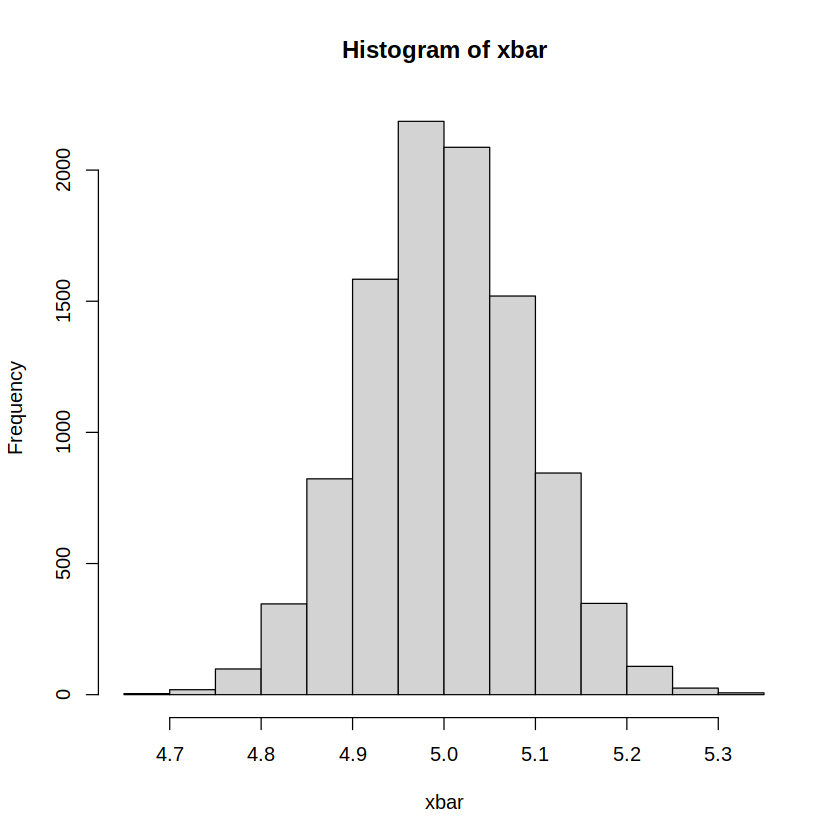

In [1]:
m = 10000
n = 500
x = matrix(rnorm(n*m, mean=5, sd=2), ncol=m, nrow=n)

xbar = colMeans(x)

hist(xbar)

Based on the lecture, we expect to see a normal distribution, and the histogram of xbar confirms that expectation 

**B.1(b) [5 points] Numerically verify the results from A.4(a)-(c). For example, for A.4(a), show that the sample standard deviation of `xbar` is *close* to $\mu$ (say within $\approx0.1$ of the true value). How could you make `xbar` closer?**

In [7]:
m = 10000
n = 500
mu = 5
sigma = 2
dist = replicate(m, rnorm(n, mean=mu, sd=sigma))
xbar_dist = colMeans(dist)

sd_xbar = sd(xbar_dist)
sd_theoretical = sigma / sqrt(n)

cat("The calculated standard deviation of xbar is:", sd_xbar)

The calculated standard deviation of xbar is: 0.08929611

In [8]:
cat("The theoretical standard deviation of xbar is:", sd_theoretical)

The theoretical standard deviation of xbar is: 0.08944272

In [9]:
sample = rnorm(n, mean=mu, sd=sigma)
xbar_sample = mean(sample)

Z = rnorm(1)
xbar_calc = mu + (sigma / sqrt(n)) * Z

cat("The xbar from the sample is:", xbar_sample)

The xbar from the sample is: 4.960166

In [10]:
cat("The xbar from the theoretical approach in part A is:", xbar_calc)

The xbar from the theoretical approach in part A is: 5.269324

In [13]:
var_calc = var(xbar_dist^2)

var_theoretical = (4 * mu^2 * sigma^2)/n + (2 * sigma^4)/n^2

cat("The variance from the sample xbar^2 is:", var_calc)

The variance from the sample xbar^2 is: 0.7965288

In [14]:
cat("The variance from the theoretical xbar^2 is:", var_theoretical)

The variance from the theoretical xbar^2 is: 0.800128

The calculated and theoretical standard deviations are less than 0.1 apart, but we could make xbar even closer to the theoretical by increasing the sample size 

## B. 2

**B.2(a) [4 points] Generate three random vectors of length $n = 500$ from:**

1. $X \sim \text{Beta}(3,1)$
2. $Y \sim \text{Beta}(3,1)$
3. $Z \sim \text{Beta}(2,3)$

**Present numerical (using `cor()`) and visual evidence that $X$ and $Y$ are (effectively) uncorrelated.**

The correlation between x and y is: -0.02584807

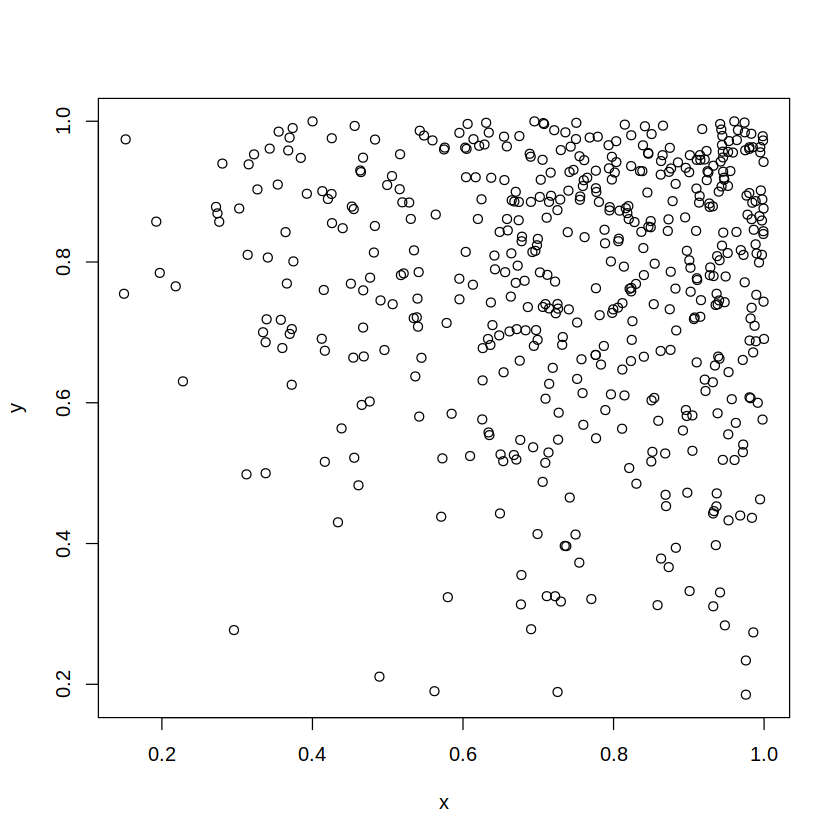

In [10]:
n = 500
x = rbeta(n, 3, 1)
y = rbeta(n, 3, 1)
z = rbeta(n, 2, 3)

corr = cor(x, y)
cat("The correlation between x and y is:", corr)

plot(x, y)

When determining if there is a correlation between x and y, we see a weak negative correlation between these elements. When the correlation coefficient is between -1 and 0, we can conclude that there is a negative correlation between the variables. Furthermore, from the graph, we can determine that this is a negative correlation because the data points are spread out with no discrenable pattern 

**B.2(b) [4 points] Create vectors `xstar` and `ystar` by taking `x` and `y` and dividing by `z`.  Are `xstar` and `ystar` correlated? Support your claim with numerical and graphical evidence.**

The correlation between xstar and ystar is: 0.8883466

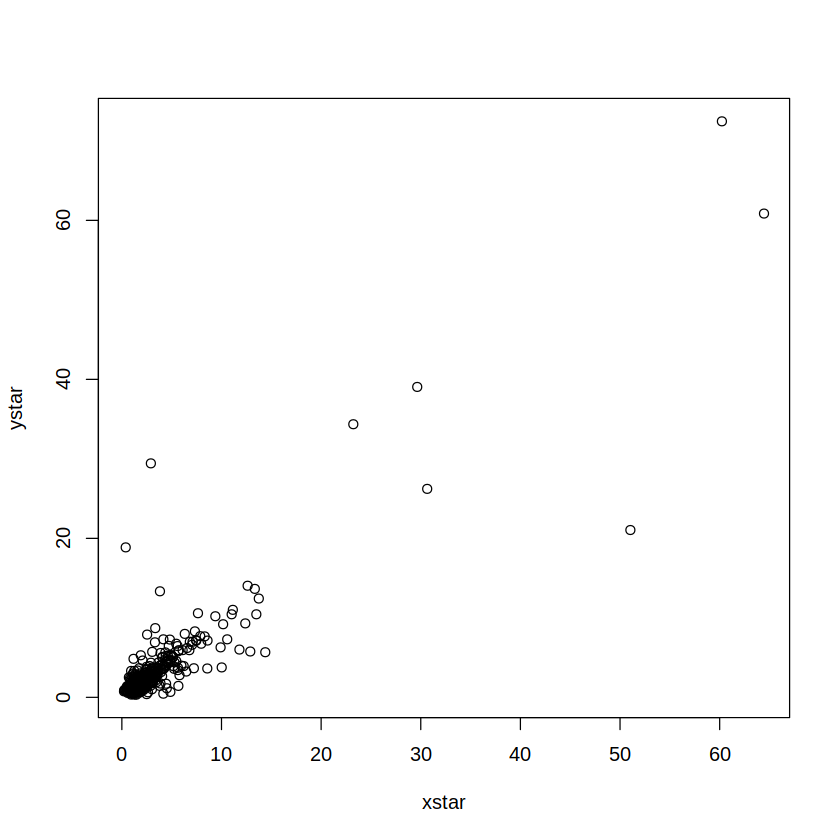

In [4]:
xstar = x / z
ystar = y / z

corr2 = cor(xstar, ystar)
cat("The correlation between xstar and ystar is:", corr2)

plot(xstar, ystar)

When x and y were divided by z, we see a strong positive correlation between these elements. When the correlation coefficient is between 0 and 1, we can conclude that there is a correlation between the variables. Furthermore, from the graph, we can determine that this is a positive correlation because the data points are clustered and moving in a positive, upward direction

**B.2(c) [4 points] [STAT5000 Only] Store these vectors in a data frame called `df`. Load the `ggplot2` library, and use the `ggplot() + geom_point()` function to create a scatter plot of `xstar` and `ystar`, and color each point relative to the value of `z`.**

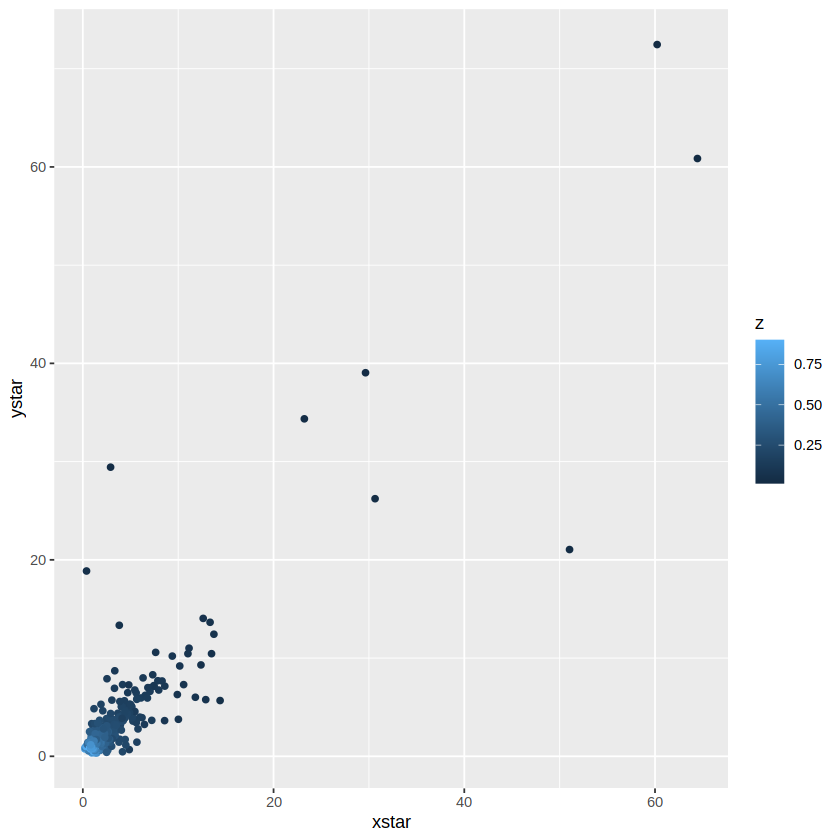

In [7]:
library(ggplot2)

df = data.frame(xstar, ystar, z)

ggplot(df, aes(x = xstar, y = ystar, color = z)) + 
    geom_point()

#### (d) [4 points] [STAT5000 Only] Interpret and analyze the results from the previous part. What practical lessons can you learn from this example?

We found that x and y were previously uncorrelated, but when we divide by z to create xstar and ystar, we see a correlation between the two variables. This is helpful when we're trying to normalize or find a relationship between two data sets. By dividing each data set by a common number, we're able to correlate the two sets, which can articulate underlying patterns that we weren't previously aware of 

## B.3 The Central Limit Theorem revisited

The code `rf(n, 2, 3)` can be used to generate $n$ random numbers from an ["$F$-distribution"](https://en.wikipedia.org/wiki/F-distribution) with parameters `2` and `3` (don't worry to much about what the $F$-distribution is or models at this point; it's just a probability distribution!). 

**B.3(a) [5 points] Construct a matrix `x` with $m = 10,000$ columns, where each column is a different sample of size $n = 25$ from the $F$-distribution with parameters `2` and `3`. Construct a histogram of one of the columns. What can you say about the shape of this distribution?**


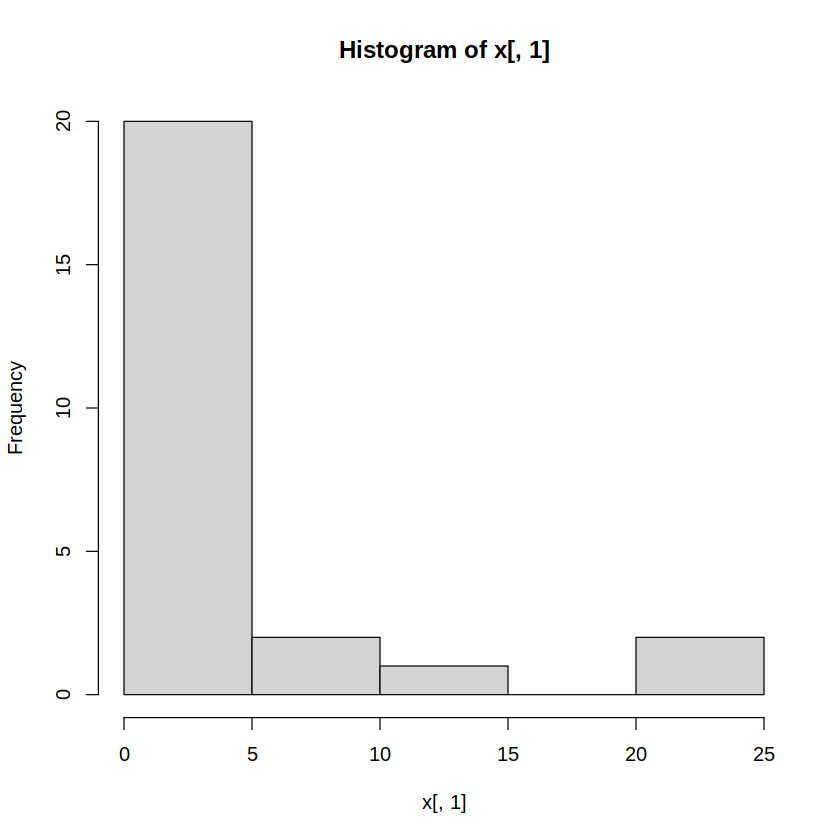

In [8]:
m = 10000
n = 25
x = replicate(m, rf(n, 2, 3))

hist(x[,1])

The distribution is right-skewed and not normal. We expect this for an F-distribution, especially with lower parameters 

**B.3(b) [5 points] Use `colMeans()` to find the mean of each sample (each column of `x`). Store these means in `xbar`. Construct a histogram of `xbar`. Does the histogram look normal (or approximately normal)? If yes, why? If no, why not?**

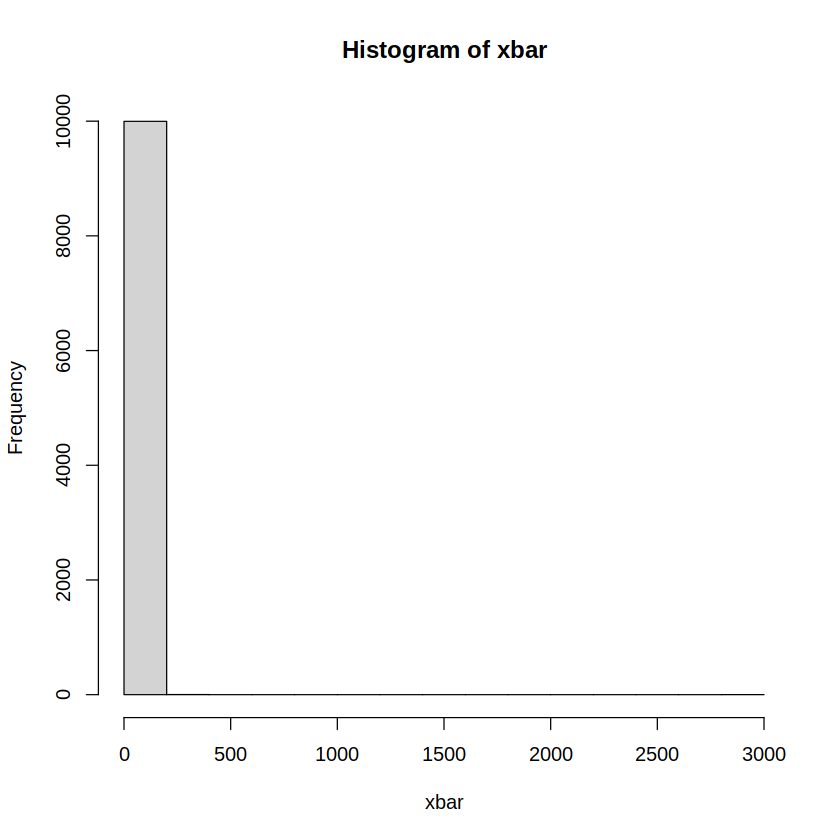

In [9]:
xbar = colMeans(x)

hist(xbar)

The histogram does not look normal because the central limit theorem requires that we have at least n = 30 and we only have n = 25 here 